In [1]:
#importing the required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the given excel data
data = pd.read_excel("iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#finding the number of columns and rows
data.shape

(150, 5)

In [4]:
#Checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
#finding the column names
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
#finding the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#sorting the columns with null values
nul_cols = data[['SL', 'SW', 'PL']]
nul_cols.isna().sum()

SL    7
SW    6
PL    6
dtype: int64

In [8]:
#filling the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(nul_cols)
nul_cols = imputer.transform(nul_cols)

In [9]:
#check data type
type(nul_cols)

numpy.ndarray

In [10]:
#convert to dataframe
nul_cols = pd.DataFrame(nul_cols,columns=['SL', 'SW', 'PL'])

In [11]:
#dropping the columns with null values from data
data.drop(['SL', 'SW', 'PL'],axis =1,inplace=True)

In [12]:
#checking data
data.head()

,PW,Classification
0,0.2,Iris-setosa
1,0.2,Iris-setosa
2,0.2,Iris-setosa
3,0.2,Iris-setosa
4,0.2,Iris-setosa


In [13]:
#concatenating the dataframes
data = pd.concat([nul_cols,data],axis=1)
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [14]:
#checking for null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
#calculating value cont for classification
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

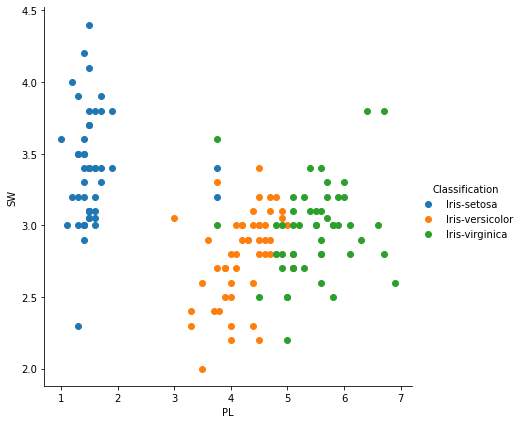

In [16]:
#plotting scatter plot to check variation with PL and SW
sns.FacetGrid(data,hue='Classification',height=6).map(plt.scatter,"PL","SW").add_legend();

# Classification models

In [17]:
#Converting categorical variables into numbers
flower_mapping ={'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica':2}
data['Classification'] = data['Classification'].map(flower_mapping)


In [18]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [19]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [20]:
#Preparing inputs and outputs
X = data.drop('Classification',axis=1)
y = data['Classification']

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
#create logistic regression object
logit_model = LogisticRegression()
#Dataset is not splitted using train_test_split and whole values are taken (cross-checking scatterplot)
#train the model using the training sets,
logit_model = logit_model.fit(X,y)
y_pred_logit = logit_model.predict(X)

In [22]:
y_pred_logit

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred_logit)

array([[49,  1,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

### >(49/50)- Iris-setosa, (47/50) - Iris-versicolor, (47/50)-Iris-virginica

In [24]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [25]:
accuracy_score(y,y_pred_logit)

0.9533333333333334

In [26]:
from sklearn import metrics
#summarize the fit of the model
print(metrics.classification_report(y,y_pred_logit))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.92      0.94      0.93        50
           2       0.94      0.94      0.94        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



## KNN

In [27]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#setting the range
neighbors=range(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X,y)
    y_pred_KNN =classifier.predict(X)

In [28]:
#finding confusion matrix
confusion_matrix(y,y_pred_KNN)

array([[48,  2,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

In [29]:
#finding accuracy score
accuracy_score(y,y_pred_KNN)

0.9466666666666667

In [30]:
#summarize the fit of the model
print(metrics.classification_report(y,y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.88      0.98      0.92        50
           2       0.98      0.90      0.94        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



### > Logistic Regression have more accuracy with 0.9533 than KNN's 0.9466

## SVM

In [31]:
from sklearn.svm import SVC
#create SVM object with kernel as linear
svm_clf = SVC(kernel='linear')
svm_df = svm_clf.fit(X,y)
y_pred_svm =svm_clf.predict(X)

In [32]:
#finding confusion matrix
confusion_matrix(y,y_pred_svm)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [33]:
#finding accuracy score
accuracy_score(y,y_pred_svm)

0.96

In [34]:
#create SVM object with kernel as rbf
svm_clf = SVC(kernel='rbf')
svm_df = svm_clf.fit(X,y)
y_pred_svm =svm_clf.predict(X)

In [35]:
#finding confusion matrix
confusion_matrix(y,y_pred_svm)

array([[48,  2,  0],
       [ 0, 48,  2],
       [ 0,  3, 47]], dtype=int64)

In [36]:
#finding accuracy score
accuracy_score(y,y_pred_svm)

0.9533333333333334

### >SVM with kernel linear have more accuracy than KNN and Logistic Regression with 0.96 accuracy

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X,y)
y_pred_dt = dt_clf.predict(X)

In [38]:
#finding confusion matrix
confusion_matrix(y,y_pred_dt)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [39]:
#finding accuracy score
accuracy_score(y,y_pred_dt)

1.0

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X,y)
y_pred_rf = rf_clf.predict(X)

In [41]:
#finding confusion matrix
confusion_matrix(y,y_pred_rf)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [42]:
#finding accuracy score
accuracy_score(y,y_pred_rf)

1.0

### > Decision tree and Random Forest has  an accuracy score of 1.0. Thus they are the best models for predicting the classification based on PL and SW

# Cross checking with train_test_split

In [43]:
#defining feature matrix(X) and response vector(y)
X = data.drop('Classification',axis=1)
y = data['Classification']

In [44]:
#splitting X and Y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.1)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)

In [46]:
confusion_matrix(y_test,y_pred_rf)

array([[6, 0, 0],
       [0, 6, 0],
       [0, 0, 3]], dtype=int64)

In [47]:
#finding accuracy score
accuracy_score(y_test,y_pred_rf)

1.0

In [48]:
print(metrics.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

